In [1]:
# Assignment 2.1
#Imports

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn

In [2]:
df = pd.read_csv('data_assignment2.csv')
print(len(df)) 

56


In [3]:
#DATA CLEANING

#Following code removes sales of homes where Land_size == NaN. Because the definition of villa is:
#"a detached or semidetached urban residence with yard and garden space"
df.dropna(subset=['Land_size'], inplace= True)

#This data point didn't make sense. Maybe commerical???
df.drop([45], inplace= True)
df

,ID,Living_area,Rooms,Land_size,Biarea,Age,Selling_price
0,1,104,5.0,271.0,25.0,33,4600000
1,2,99,5.0,1506.0,6.0,88,4450000
2,3,133,6.0,486.0,NaN,44,4900000
3,4,175,7.0,728.0,NaN,14,6625000
4,5,118,6.0,1506.0,NaN,29,4600000
5,6,133,6.0,823.0,NaN,12,6650000
6,7,70,4.0,1685.0,70.0,53,2800000
7,8,134,6.0,1593.0,49.0,57,6100000
8,9,70,5.0,1120.0,102.0,81,3000000
9,10,133,6.0,1503.0,NaN,51,3000000


In [4]:
#Dataframe to numpy array

arrayX = df['Living_area'].to_numpy().reshape(-1,1)
arrayY = df['Selling_price'].to_numpy().reshape(-1,1)

#Linear regression model

model = LinearRegression().fit(arrayX, arrayY)

print('Slope of the line: ',model.coef_)
print('Intercept of the line: ', model.intercept_)


#Predictions 

surface_predict = np.array([100,150,200]).reshape(-1, 1)
y_pred = model.predict(surface_predict)


Slope of the line:  [[23597.79474944]]
Intercept of the line:  [1809821.21594096]


[[4169600.69088546]
 [5349490.42835771]
 [6529380.16582996]]


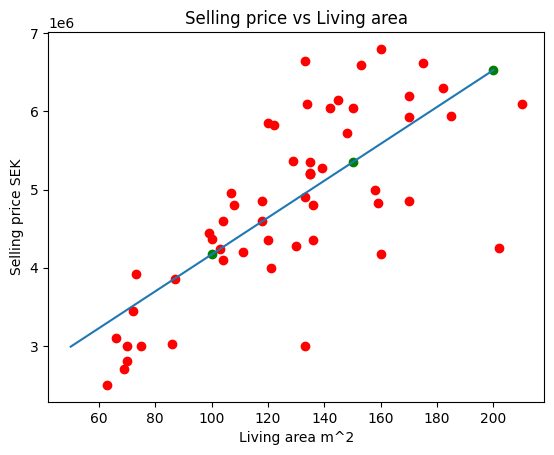

In [5]:
fig, ax = plt.subplots()
ax.set_title('Selling price vs Living area')
ax.set_ylabel('Selling price SEK')
ax.set_xlabel('Living area m^2')

xfit = np.linspace(50 , 200, 1000)
yfit = model.predict(xfit[:, np.newaxis])

# RED == Scatter plot of villas sold in landvetter GREEN == Predicted price of villas of given size.

ax.scatter(x=df['Living_area'], y=df['Selling_price'], c='Red')
plt.scatter(surface_predict, y_pred, c='green')
print(y_pred)
plt.plot(xfit, yfit)
plt.rcParams["figure.figsize"] = (4,10)
plt.show()





<AxesSubplot: xlabel='Living_area', ylabel='Selling_price'>

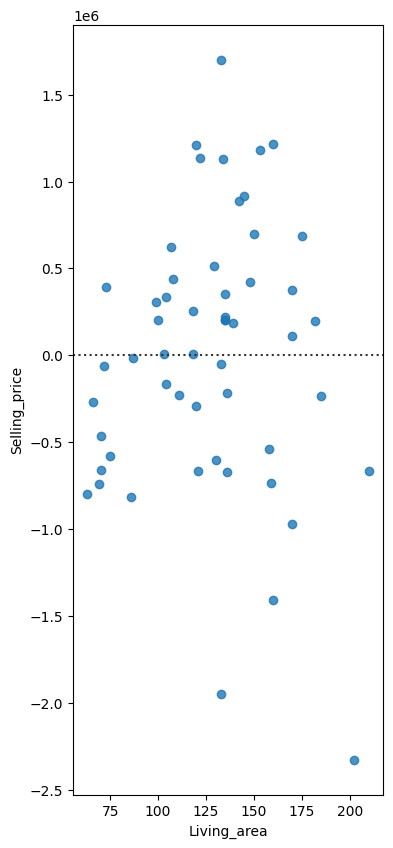

In [6]:
seaborn.residplot(data=df, x="Living_area", y="Selling_price")

## 2.

In [7]:
# Assignment 2.2
#Imports
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
x, y = load_iris(return_X_y=True)

In [8]:
log_reg = LogisticRegression(max_iter=800).fit(x, y)
confusion_matrix(y, log_reg.predict(x))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  1, 49]])

In [9]:
#

k_neighbors = [1, 3, 6, 7, 11, 16, 23, 25, 31, 100]
weight = ["uniform", "distance"]

for k in k_neighbors:
    for w in weight:
        k_near = KNeighborsClassifier(k, weights=w).fit(x, y)
        
        print("K={}, weight={}, score={}".format(k, w, k_near.score(x, y)))

K=1, weight=uniform, score=1.0
K=1, weight=distance, score=1.0
K=3, weight=uniform, score=0.96
K=3, weight=distance, score=1.0
K=6, weight=uniform, score=0.9733333333333334
K=6, weight=distance, score=1.0
K=7, weight=uniform, score=0.9733333333333334
K=7, weight=distance, score=1.0
K=11, weight=uniform, score=0.9733333333333334
K=11, weight=distance, score=1.0
K=16, weight=uniform, score=0.9866666666666667
K=16, weight=distance, score=1.0
K=23, weight=uniform, score=0.98
K=23, weight=distance, score=1.0
K=25, weight=uniform, score=0.98
K=25, weight=distance, score=1.0
K=31, weight=uniform, score=0.96
K=31, weight=distance, score=1.0
K=100, weight=uniform, score=0.66
K=100, weight=distance, score=1.0


In [10]:
knn_reg = KNeighborsClassifier(3, weights="distance").fit(x, y)

confusion_matrix(y, knn_reg.predict(x))

array([[50,  0,  0],
       [ 0, 50,  0],
       [ 0,  0, 50]])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4f24d32b-d662-4014-8160-82686480ba2d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>